In [245]:
import pandas as pd # для работы с таблицами
import numpy as np # для работы с работы с математикой

import plotly.express as px # для графиков
import plotly.graph_objects as go
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
import seaborn as sns # для графиков

import plotly.express as px 
# Это особенные динамические графики, правда он не в ходит в conda и его приходится устанавливать самостоятельно

### В качестве датасета мы выбрали таблицу продаж видео игр.(https://www.kaggle.com/datasets/thedevastator/global-video-game-sales) ###

In [60]:
df = pd.read_csv('downloads/vgsales.csv', sep=',')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
df.shape

(16598, 11)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16598 non-null  int64         
 1   Name          16598 non-null  object        
 2   Platform      16598 non-null  object        
 3   Year          16327 non-null  datetime64[ns]
 4   Genre         16598 non-null  object        
 5   Publisher     16540 non-null  object        
 6   NA_Sales      16598 non-null  float64       
 7   EU_Sales      16598 non-null  float64       
 8   JP_Sales      16598 non-null  float64       
 9   Other_Sales   16598 non-null  float64       
 10  Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


Заметим, что данные в столбце "Year" имеют тип данных datetime64[ns]. Это подходящий для нас тип данных, поэтому данную колонку оставим без изменений.

In [31]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Проверим есть ли пропуски в данных.

In [172]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
Name_length       0
dtype: int64

Видим, что пропуски есть в столбцах "Year" и "Publisher"

Посмотрим на данные строки.

In [174]:
df[df['Year'].isnull() | df['Publisher'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_length


Так как все пропущенные данные - не числовые, их следует удалить. (К тому же их небольшое количество)

In [173]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

(16291, 12)

Видим, что количество оставшихся данных сошлось с предпологаемым ($16598 - 307 = 16291$), значит все в порядке.

**Второй этап - новые признаки**

Нам захотелось исследовать влияние длины названия игры на различные показатели, поэтому мы решили добавить соответственный столбец к нашим данным - 'Name_length'.

In [61]:
df['Name_length'] = df['Name'].str.len() - df['Name'].str.count(' ')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_length
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,9
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,15
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,12
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,15
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,22
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,29
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,24
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,42
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,8


3. **Третий этап - визуализация**

3.1 ***Проведем EDA. Для начала воспользуемся одномерным анализом и пройдемся по каждому из показателей.***

- 3.1.1 **Визуализируем данные по жанрам игр. Посмотрим как часто встречаются те или иные жанры.**

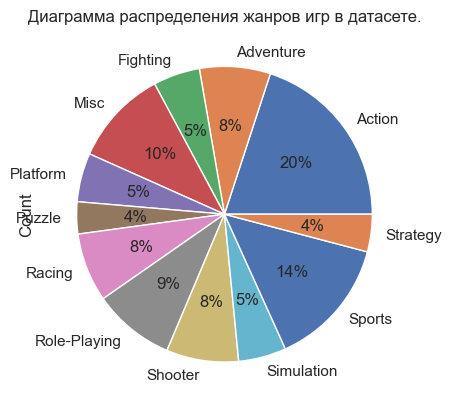

In [153]:
df_genres = df['Genre'].value_counts().reset_index()
df_genres.columns = ['Genre', 'Count']
df_genres.groupby(['Genre']).sum().plot(kind = 'pie', y = 'Count', autopct = '%1.0f%%', title = 'Диаграмма распределения жанров игр в датасете.')
plt.legend('', frameon=False)

- 3.1.2 **Визуализируем данные по годам. Посмотрим как часто выпускались игры в разных годах.**

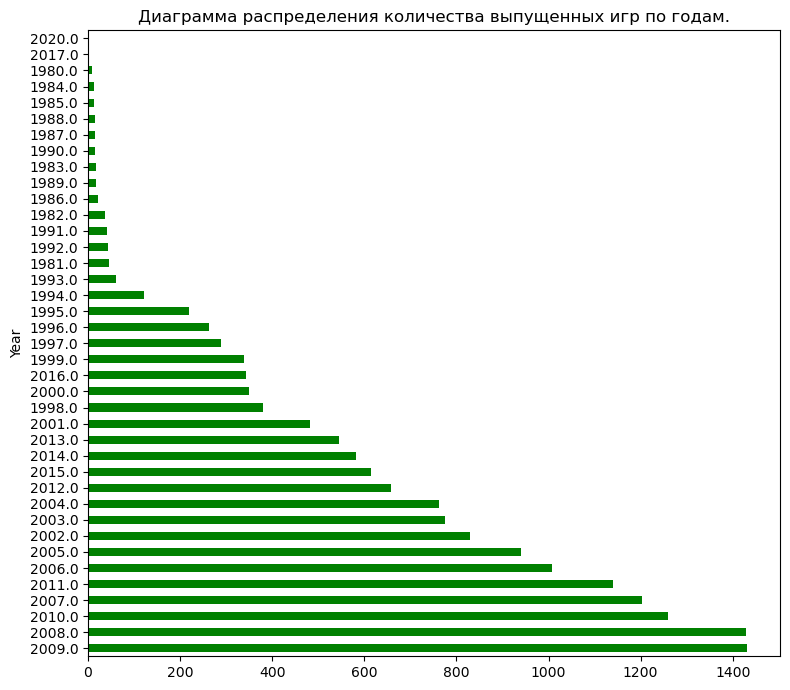

In [130]:
df_years = df['Year'].value_counts().reset_index()
df_years.columns = ['Year', 'Number of games']
df_years.plot.barh(x = 'Year', y = 'Number of games', title = 'Диаграмма распределения количества выпущенных игр по годам.', color='green', figsize = (8, 7))
plt.legend('', frameon=False)
plt.tight_layout()

- 3.1.3 **Визуализируем данные по платформам, на которых выпускались игры. Посмотрим на количество игр, выпущенных на разных платформах.**

In [151]:
df_platforms = df['Platform'].value_counts().reset_index()
df_platforms.columns = ['Platform', 'Games_amount']
df_platforms

,Platform,Games_amount
0,DS,2163
1,PS2,2161
2,PS3,1329
3,Wii,1325
4,X360,1265
5,PSP,1213
6,PS,1196
7,PC,960
8,XB,824
9,GBA,822


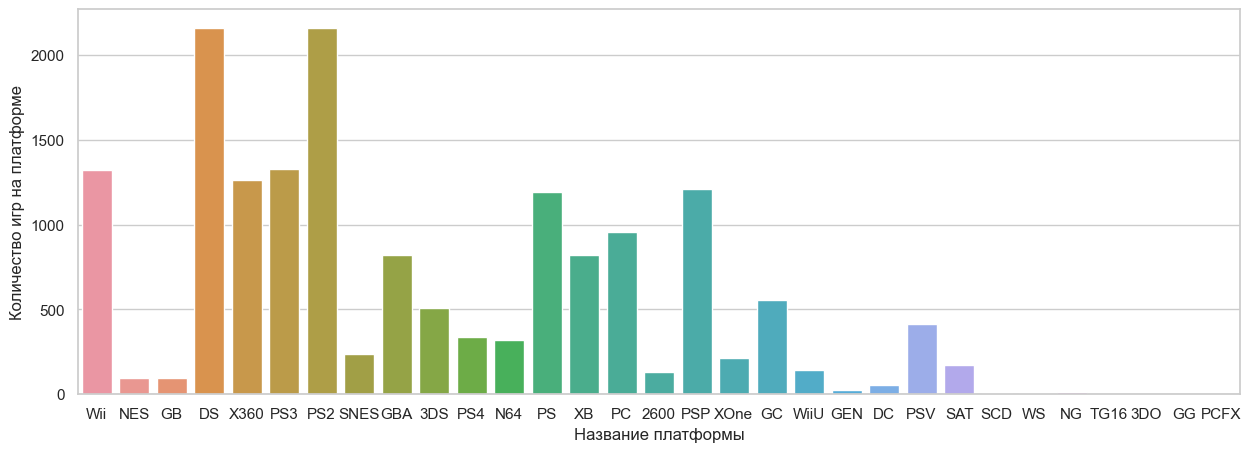

In [150]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Platform', data = df)
plt.xlabel('Название платформы')
plt.ylabel('Количество игр на платформе')
plt.show() 

Как видно из графика и таблицы, есть платформы на которых выпускалось крайне малое количество игр по сравнению с другими платформами.

- 3.1.4 **Визуализируем данные по регионам, в которых продавались игры. Посмотрим на количество игр, проданных в разных частях Света.**

<AxesSubplot:title={'center':'% проданных игр по регионам в общемировых продажах'}, ylabel='None'>

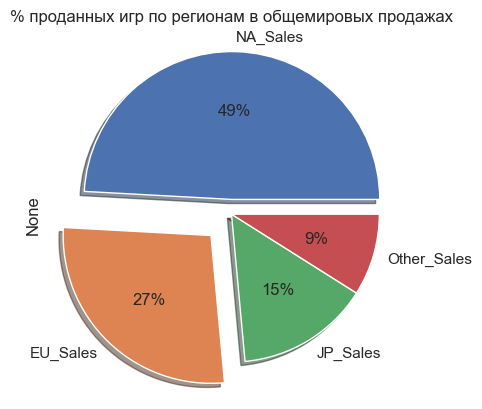

In [238]:
gr_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
gr_sales_explode = (0.1, 0.2, 0, 0)
gr_sales.plot(kind='pie',  title='% проданных игр по регионам в общемировых продажах', autopct = '%1.0f%%', shadow=True, explode=gr_sales_explode)

<AxesSubplot:>

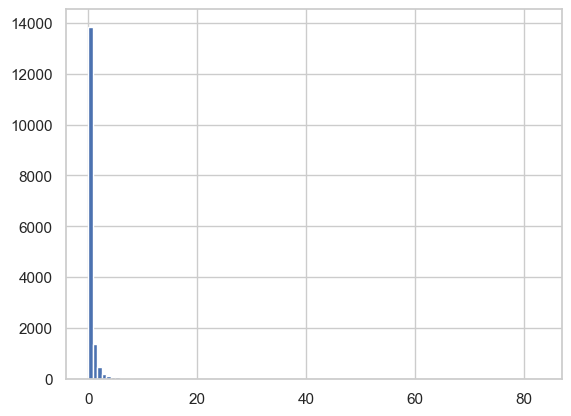

In [244]:
df['Global_Sales'].hist(bins = 100)

Отсюда видно, что большая часть выпущенных игр продалась тиражом меньше 1 млн копий.

3.2 ***Теперь проведем многомерные визуализации данных и попытаемся найти закономерности в них.***

- 3.2.1.1 **Для начала проведем сортировку данных по годам, чтобы в последующем построить корректные графики изменения данных по годам.**

In [246]:
df = df.sort_values(by = 'Year', ascending=True)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_length
257,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31,9
6211,6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.00,0.00,0.27,6
1948,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.00,0.01,1.05,8
5282,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.00,0.00,0.34,7
1746,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.00,0.01,1.15,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4588,4660,Hyrule Warriors,3DS,2016.0,Action,Nintendo,0.16,0.12,0.11,0.03,0.42,14
15944,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01,41
14136,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03,41
16135,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01,29


- 3.2.1.2 **Построим отдельный датафрейм для нескольких параметров из изначальной таблицы данных, чтобы использовать их для построения нового графика**

In [248]:
df_bt = df[['Publisher', 'Year', 'Global_Sales', 'Name_length']].copy()
df_bt['Games_Amount'] = 1
df_bt = df_bt.groupby(['Year', 'Publisher']).sum().reset_index()
df_bt['Name_length'] = df_bt['Name_length'] / df_bt['Games_Amount']
df_bt.columns = ['Year', 'Publisher', 'Global_Sales_per_year', 'Mean_name_length', 'Total_games_amount_per_year']
df_bt

,Year,Publisher,Global_Sales_per_year,Mean_name_length,Total_games_amount_per_year
0,1980.0,Activision,3.02,7.000000,5
1,1980.0,Atari,8.36,9.750000,4
2,1981.0,20th Century Fox Video Games,1.35,10.000000,3
3,1981.0,Activision,8.50,9.500000,6
4,1981.0,Atari,8.45,14.545455,11
...,...,...,...,...,...
2316,2016.0,Yeti,0.02,11.000000,1
2317,2016.0,dramatic create,0.03,35.000000,2
2318,2017.0,Idea Factory,0.01,29.000000,1
2319,2017.0,Sega,0.04,41.000000,2


Мы дополнительно просуммировали все данные кроме годов и издателей для построеня будущего графика (в нем мы используем суммарные показатели по общим продажам, средней длине названия и количество игр, выпущенных в данный год).

- 3.2.1.3 **Данный график отображает изменения показателя суммарного количества игр в зависимости от средней длины названия игр, выпущенных одной компанией, сквозь различные года**

In [249]:
import plotly.express as px
fig = px.scatter(df_bt, x = 'Mean_name_length', y = 'Global_Sales_per_year', animation_frame = 'Year', color = 'Publisher', size = 'Total_games_amount_per_year')
fig.show()

Также заметим, что радиус кругов отображает количество выпущенных игр данной компанией за этот год. (К сожалению, по какой-то причине на графике показываются только 2 компании для всех лет. Мы пытались исправить данную проблему, но так и не смогли. Может Вы могли бы подсказать в чем загвоздка?) )

- 3.2.2.1 **Аналогично предыдущему графику подготавливаем необходимые данные**

In [184]:
df_gg = df[['Genre', 'Global_Sales', 'Year']].copy()
df_gg = df_gg.groupby(['Genre', 'Year']).sum().reset_index()
df_gg

,Genre,Year,Global_Sales
0,Action,1980.0,0.34
1,Action,1981.0,14.84
2,Action,1982.0,6.52
3,Action,1983.0,2.86
4,Action,1984.0,1.85
...,...,...,...
384,Strategy,2012.0,3.33
385,Strategy,2013.0,6.33
386,Strategy,2014.0,0.99
387,Strategy,2015.0,1.82


- 3.2.2.2 **Данный график отображает суммарное количество проданных игр конкретным жанром сквозь года**

In [185]:
import plotly.express as px

fig = px.bar(df_gg, x = "Genre", y = "Global_Sales", color = "Genre", animation_frame = "Year")
fig.show()

- 3.2.3 **Для большей наглядности взаимосвязи данных дополнительно нарисуем корреляционную матрицу для продаж игр в разных частях Света**

In [252]:
df_c = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].copy()
corr = df_c.corr()
corr.style.background_gradient(cmap='coolwarm')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,0.941269,0.903264,0.612774,0.747964,1.000000


Заметим, что наибольший коэффициент с глобальными продажами имеют продажи в Северной Америке, что может означать, что именно данная часть Света имеет одно из наибольших влияний на продажи и разработку игр.

- 3.2.4 **Рассмотрим взаимосвязь между данными о длине названий игр и их общих продаж**

Для начала посмотрим количество уникальных названий игр, так как некоторые из них выпускались одновременно на нескольких платформах. В ином случае мы получим несколько значений продаж для одной и той же игры, а нам важны лишь ее суммарные продажи.

In [91]:
len(df['Name'].unique())

11493

Видим, что всего было выпущено 11493 игр с уникальными названиями.

Создадим отдельный датасет для работы только с названиями игр и количеством проданных копий.

In [93]:
df_new = df[['Name', 'Global_Sales']].copy()
df_new

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01
16594,Men in Black II: Alien Escape,0.01
16595,SCORE International Baja 1000: The Official Game,0.01
16596,Know How 2,0.01


Теперь просуммируем продажи игр с одинаковыми названиями.

In [98]:
df_new = df_new.groupby('Name').sum().reset_index()
df_new

,Name,Global_Sales
0,'98 Koshien,0.41
1,.hack//G.U. Vol.1//Rebirth,0.17
2,.hack//G.U. Vol.2//Reminisce,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.16
4,.hack//G.U. Vol.3//Redemption,0.17
...,...,...
11488,thinkSMART: Chess for Kids,0.01
11489,uDraw Studio,2.46
11490,uDraw Studio: Instant Artist,0.21
11491,wwe Smackdown vs. Raw 2006,3.00


Как видим, мы получили 11493 строк - столько же, сколько всего было уникальных игр, то есть всё корректно.

Теперь достроим отдельный столбец с длиной названий игр.

In [99]:
df_new['Name_length'] = df_new['Name'].str.len() - df_new['Name'].str.count(' ')
df_new

,Name,Global_Sales,Name_length
0,'98 Koshien,0.41,10
1,.hack//G.U. Vol.1//Rebirth,0.17,25
2,.hack//G.U. Vol.2//Reminisce,0.23,27
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.16,36
4,.hack//G.U. Vol.3//Redemption,0.17,28
...,...,...,...
11488,thinkSMART: Chess for Kids,0.01,23
11489,uDraw Studio,2.46,11
11490,uDraw Studio: Instant Artist,0.21,25
11491,wwe Smackdown vs. Raw 2006,3.00,22


Построим график зависимости продаж игр от длины их названия.

<AxesSubplot:xlabel='Name_length', ylabel='Global_Sales'>

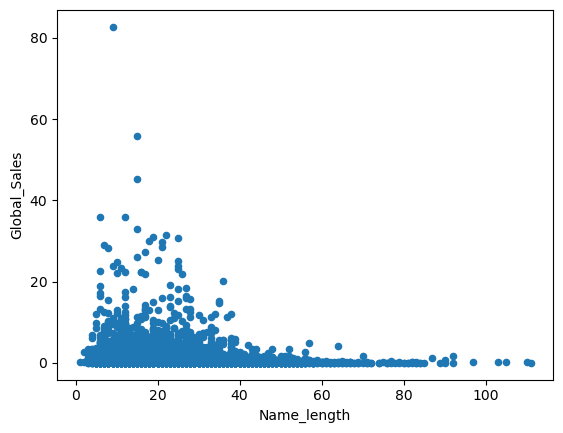

In [101]:
df_new.plot.scatter(x = 'Name_length', y = 'Global_Sales')

Из графика видно, что большая часть показателей по продажам находится ниже 20 млн копий. Создадим новый датасет с данным ограничением.

In [102]:
df_new = df_new[df_new['Global_Sales'] < 20]
df_new

,Name,Global_Sales,Name_length
0,'98 Koshien,0.41,10
1,.hack//G.U. Vol.1//Rebirth,0.17,25
2,.hack//G.U. Vol.2//Reminisce,0.23,27
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.16,36
4,.hack//G.U. Vol.3//Redemption,0.17,28
...,...,...,...
11488,thinkSMART: Chess for Kids,0.01,23
11489,uDraw Studio,2.46,11
11490,uDraw Studio: Instant Artist,0.21,25
11491,wwe Smackdown vs. Raw 2006,3.00,22


Нарисуем график, аналогичный предыдущему для нового датасета.

<AxesSubplot:xlabel='Name_length', ylabel='Global_Sales'>

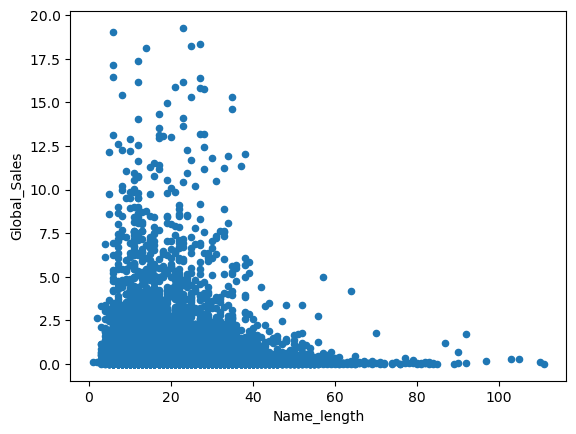

In [103]:
df_new.plot.scatter(x = 'Name_length', y = 'Global_Sales')

Из нового графика видно, что опять таки большая часть данных по показателю продаж находится ниже 7.5 млн копий. Построим новый датасет с ограничением и аналогичный график для нее.

In [104]:
df_new = df_new[df_new['Global_Sales'] < 7.5]
df_new

,Name,Global_Sales,Name_length
0,'98 Koshien,0.41,10
1,.hack//G.U. Vol.1//Rebirth,0.17,25
2,.hack//G.U. Vol.2//Reminisce,0.23,27
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.16,36
4,.hack//G.U. Vol.3//Redemption,0.17,28
...,...,...,...
11488,thinkSMART: Chess for Kids,0.01,23
11489,uDraw Studio,2.46,11
11490,uDraw Studio: Instant Artist,0.21,25
11491,wwe Smackdown vs. Raw 2006,3.00,22


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


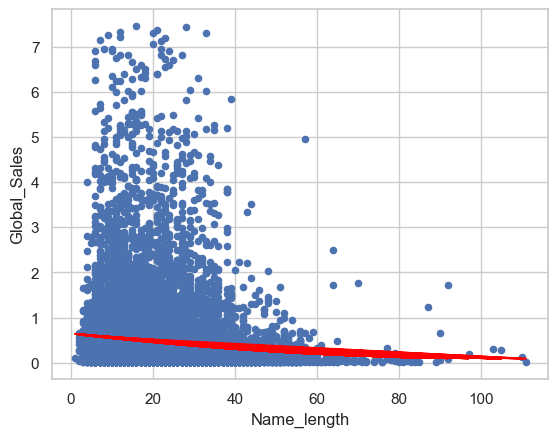

In [263]:
df_new.plot.scatter(x = 'Name_length', y = 'Global_Sales')
z = np.polyfit (df_new['Name_length'], df_new['Global_Sales'], 2 )
p = np.poly1d (z)
plt.plot (df_new['Name_length'], p(df_new['Name_length']), color = 'red')

Из данного графика мы уже можем сделать предположение о том, что существует обратная связь между длиной названия игры и ее общемировыми продажами (это видно и по красной полиномиальной линии тренда).

- 3.2.5 **Рассмотрим взаимосвязь между количеством проданных игр в Северной Америке и во всем мире**

Ранее мы уже утверждали, что связь между данными показателями сильна, проверим это на диаграмме рассеяния. Для этого создадим отдельный датасет с тремя колонками из изначальной таблицы и проделаем с ними аналогичные предыдущему пункту операции.

In [253]:
df_na = df[['Name', 'NA_Sales', 'Global_Sales']].copy()
df_na = df_na.groupby('Name').sum().reset_index()
df_na

,Name,NA_Sales,Global_Sales
0,'98 Koshien,0.15,0.41
1,.hack//G.U. Vol.1//Rebirth,0.00,0.17
2,.hack//G.U. Vol.2//Reminisce,0.11,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.00,0.16
4,.hack//G.U. Vol.3//Redemption,0.00,0.17
...,...,...,...
11320,thinkSMART FAMILY!,0.03,0.03
11321,thinkSMART: Chess for Kids,0.01,0.01
11322,uDraw Studio,1.67,2.46
11323,uDraw Studio: Instant Artist,0.09,0.21


Заметим, что в некоторых строчках в Северной Америке нулевые продажи. Удалим данные строки.

In [254]:
df_na = df_na[df_na.NA_Sales != 0.00]
df_na

,Name,NA_Sales,Global_Sales
0,'98 Koshien,0.15,0.41
2,.hack//G.U. Vol.2//Reminisce,0.11,0.23
5,.hack//Infection Part 1,0.49,1.27
7,.hack//Mutation Part 2,0.23,0.68
8,.hack//Outbreak Part 3,0.14,0.46
...,...,...,...
11319,thinkSMART,0.09,0.10
11320,thinkSMART FAMILY!,0.03,0.03
11321,thinkSMART: Chess for Kids,0.01,0.01
11322,uDraw Studio,1.67,2.46


Теперь можно нарисовать диаграмму рассеяния

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='NA_Sales', ylabel='Global_Sales'>

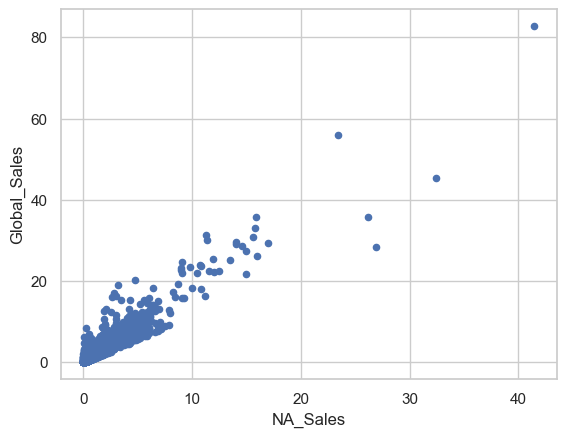

In [255]:
df_na.plot.scatter(x = 'NA_Sales', y = 'Global_Sales')

Видно, что большая часть данных находится в пределе до 10 млн проданных копий в Северной Америке. Применим данное ограничение и нарисуем новую диаграмму

In [256]:
df_na = df_na[df_na['NA_Sales'] < 10]
df_na

,Name,NA_Sales,Global_Sales
0,'98 Koshien,0.15,0.41
2,.hack//G.U. Vol.2//Reminisce,0.11,0.23
5,.hack//Infection Part 1,0.49,1.27
7,.hack//Mutation Part 2,0.23,0.68
8,.hack//Outbreak Part 3,0.14,0.46
...,...,...,...
11319,thinkSMART,0.09,0.10
11320,thinkSMART FAMILY!,0.03,0.03
11321,thinkSMART: Chess for Kids,0.01,0.01
11322,uDraw Studio,1.67,2.46


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


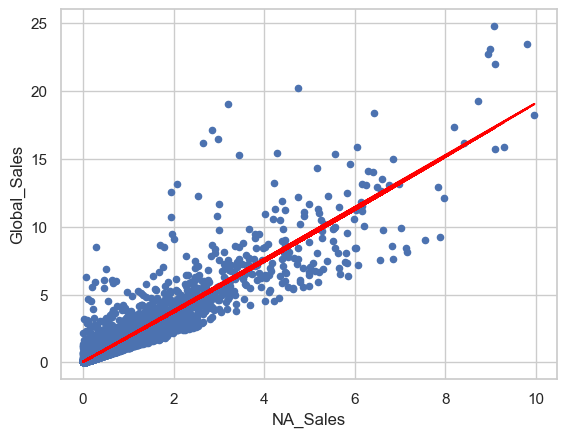

In [261]:
df_na.plot.scatter(x = 'NA_Sales', y = 'Global_Sales')
z = np.polyfit (df_na['NA_Sales'], df_na['Global_Sales'], 2 )
p = np.poly1d (z)
plt.plot (df_na['NA_Sales'], p(df_na['NA_Sales']), color = 'red')

На данном графике мы действительно можем заметить положительную зависимость количества проданных игр во всем мире от количества проданных игр в Северной Америке (это видно и по красной полиномиальной линии тренда).

- 3.2.6 **Рассмотрим взаимосвязь между жанром и продажами за все года**

Заметим, что на графике 3.2.2.2 в последние несколько лет наблюдался рост продаж игр в жанре 'Экшен' и это может стать тенденцией на последуюшие года.

4.1 ***Гипотезы***

На данный момент мы имеем следуюшие 3 гипотезы, которые были отмечены в пунктах 3.2.4-3.2.6:

1. Начиная с n-го символа в своем названии игра начинает терять в продажах. 

2. Продажи игр на Северо-Американском рынке имеют положительные тенденции влияния на общемировые продажи. В будудщем это может сильно сказаться на тенденции развития игровой индустрии и внести северо-американские предпочтения в разработки.

3. Жанр 'Экшен' также имеет положительное влияние на общемировые продажи. Данный жанр может стать основным в ближайшие годы.

Все данные гипотезы мы собираемся проверить. И далее на их основе построить ML-модель, предсказывающую основные жанры, длины названий и мировые продажи соответствующих игр (регрессионная модель). Для каждой из гипотез мы также хотим построить кластеризацию, чтобы выделить основные группы, имеющие наибольшее влияние на игровую индустрию. 

5. ***Дополнительные моменты***

1. Мы собираемся дополнить основной датасет дополнительными столбцами из следующих сайтов: https://www.kaggle.com/datasets/deepcontractor/top-video-games-19952021-metacritic (оценки пользователей и критиков), а также сделать парсинг данных с сайта https://sullygnome.com/ - количество просмотров геймплея игр с платформы "Твич". В первом случае мы смогли написать часстичный код, но не дообработали его до конца (см. ниже).

2. Мы знаем, что не успели оформить все графики названиями, а также ввести корректное оглавление и описания и собираемся это доделать в скором времени. 

3. Мы старались построить как можно больше красивых и разнообразных графиков, надеюсь Вы оцените)

In [ ]:
df_plus = pd.read_csv('all_games.csv', sep=',')
df_plus.head()


df_plus1 = df_plus.merge(df, left_on ='name', right_on = 'Name', how = 'right')
df_plus1.isnull().sum()
df_plus1 
df_plus1.dropna(inplace=True)
df_plus1.reset_index(inplace=True, drop=True)
df_plus1